In [1]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all')

print("Number of articles: " + str(len(news.data)))
print("Number of diffrent categories: " + str(len(news.target_names)))

news.target_names

Number of articles: 18846
Number of diffrent categories: 20


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# Selecting categories

In [2]:
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space']

In [3]:
# As perfrom sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
import time

def train(classifier, X, y):
    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

    classifier.fit(X_train, y_train)
    end = time.time()

    print("Accuracy: " + str(classifier.score(X_test, y_test)) + ", Time duration: " + str(end - start))
    return classifier 


#Text Classifier

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

trial1 = Pipeline([ ('vectorizer', TfidfVectorizer()), ('classifier', MultinomialNB())])

train(trial1, news.data, news.target)

Accuracy: 0.8538461538461538, Time duration: 4.909414052963257


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [7]:
#Parameter Scaling
import nltk
from nltk.corpus import stopwords

trial2 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),('classifier', MultinomialNB())])

train(trial2, news.data, news.target)


Accuracy: 0.8806366047745358, Time duration: 4.3276755809783936


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [8]:
#alpha prameter
for alpha in [5, 0.5, 0.05, 0.005, 0.0005]:
    trial3 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),('classifier', MultinomialNB(alpha=alpha))])

train(trial3, news.data, news.target)

Accuracy: 0.9169761273209549, Time duration: 4.268531799316406


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...   vocabulary=None)), ('classifier', MultinomialNB(alpha=0.0005, class_prior=None, fit_prior=True))])

In [9]:
#final result show alpha prameter at 0.0005
trial4 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'), min_df=5)), ('classifier', MultinomialNB(alpha=0.005)) ])

train(trial4, news.data, news.target)

Accuracy: 0.910079575596817, Time duration: 4.185789108276367


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...    vocabulary=None)), ('classifier', MultinomialNB(alpha=0.005, class_prior=None, fit_prior=True))])

In [11]:
import string
from nltk.stem import PorterStemmer
from nltk import word_tokenize

def stemming_tokenizer(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in word_tokenize(text)]

trial5 = Pipeline([ ('vectorizer', TfidfVectorizer(tokenizer=stemming_tokenizer, stop_words=stopwords.words('english') + list(string.punctuation))), ('classifier', MultinomialNB(alpha=0.005))])

train(trial5, news.data, news.target)

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Accuracy: 0.9230769230769231, Time duration: 126.61427998542786


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...ue, vocabulary=None)), ('classifier', MultinomialNB(alpha=0.005, class_prior=None, fit_prior=True))])

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

for classifier in [SGDClassifier(), LinearSVC()]:
    trial6 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))), ('SGDClassifier()', classifier)])

train(trial6, news.data, news.target)

Accuracy: 0.9320954907161804, Time duration: 7.223083972930908


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

Accuracy: 0.9352785145888595, Time duration: 13.709488153457642


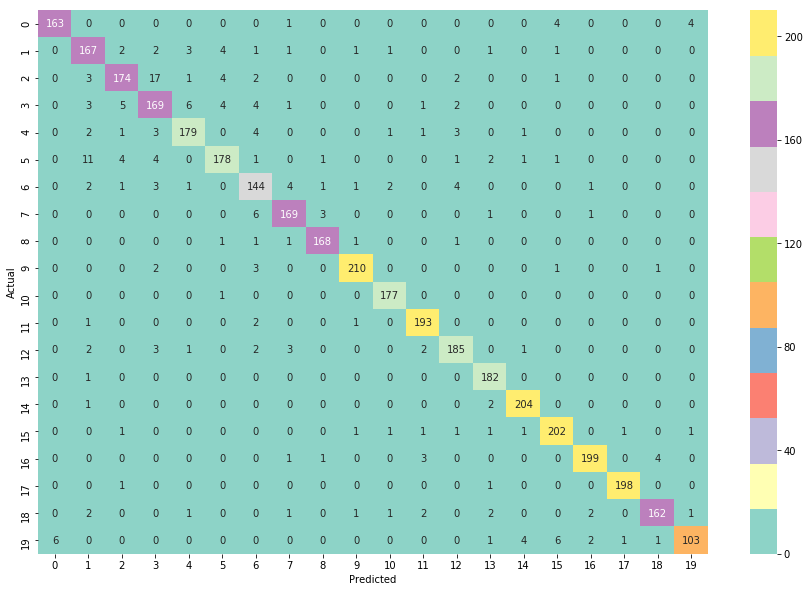

In [20]:
#MODEL Evaluation
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

start = time.time()
model = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),('classifier', LinearSVC(C=10))])
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.2, random_state=11)
model.fit(X_train, y_train)
end = time.time()

print("Accuracy: " + str(model.score(X_test, y_test)) + ", Time duration: " + str(end - start))

y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Model upload to s3 bucket

In [21]:
from sklearn.externals import joblib 
joblib.dump(model, 'LinearSVC_model.pkl')

['LinearSVC_model.pkl']